<a href="https://colab.research.google.com/github/nivnaus/Ass4ML/blob/main/ass4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Download data
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
!tar -xzf 102flowers.tgz

import os, scipy.io, shutil, numpy as np
from sklearn.model_selection import train_test_split

# 2. Load labels
data = scipy.io.loadmat('imagelabels.mat')
labels = data['labels'][0]
image_files = sorted([f for f in os.listdir('jpg') if f.endswith('.jpg')])
image_paths = [os.path.join('jpg', f) for f in image_files]

# 3. Random Split (Run 1: random_state=42)
train_p, temp_p, train_l, temp_l = train_test_split(image_paths, labels, test_size=0.5, random_state=42, stratify=labels)
val_p, test_p, val_l, test_l = train_test_split(temp_p, temp_l, test_size=0.5, random_state=42, stratify=temp_l)

# 4. Organize Folders
def organize(paths, labels, split_name):
    for path, label in zip(paths, labels):
        target_dir = f'flowers_split1/{split_name}/{label}'
        os.makedirs(target_dir, exist_ok=True)
        shutil.copy(path, target_dir)

organize(train_p, train_l, 'train')
organize(val_p, val_l, 'val')
organize(test_p, test_l, 'test')

--2026-01-11 10:22:46--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/flowers/102/102flowers.tgz [following]
--2026-01-11 10:22:47--  https://thor.robots.ox.ac.uk/flowers/102/102flowers.tgz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/octet-stream]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  12.0MB/s    in 29s     

2026-01-11 10:23:18 (11.2 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2026-01-11 10:23:18--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels

Found 4094 images belonging to 102 classes.
Found 2047 images belonging to 102 classes.
Found 2048 images belonging to 102 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.0237 - loss: 4.7953 - val_accuracy: 0.1050 - val_loss: 4.1974
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 94s 734ms/step - accuracy: 0.0946 - loss: 4.1494 - val_accuracy: 0.3151 - val_loss: 3.2248
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 736ms/step - accuracy: 0.2537 - loss: 3.3402 - val_accuracy: 0.4729 - val_loss: 2.2891
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 737ms/step - accuracy: 0.4109 - loss: 2.4877 - val_accuracy: 0.5867 - val_loss: 1.7129
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 739ms/step - accuracy: 0.5144 - loss: 1.9554 - val_accuracy: 0.6512 - val_loss: 1.4122
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 738ms/step - accuracy: 0.6162 - loss: 1.5027 - val_accuracy: 0.7313 - val_loss: 1.0799
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 740ms/step - accuracy: 0.6993 - loss: 1.1620 - val_accuracy: 0.7592 - val_loss: 0.9485
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 737ms/step - accuracy: 0.7282 - loss: 1.0

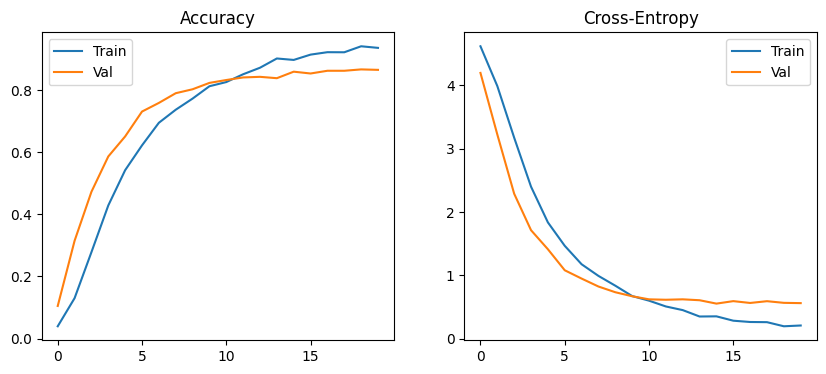

64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.8402 - loss: 0.6385


[0.5756695866584778, 0.84814453125]

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Data Prep [cite: 18]
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_it = datagen.flow_from_directory('flowers_split1/train', target_size=(224, 224), batch_size=32, class_mode='sparse')
val_it = val_gen.flow_from_directory('flowers_split1/val', target_size=(224, 224), batch_size=32, class_mode='sparse')
test_it = val_gen.flow_from_directory('flowers_split1/test', target_size=(224, 224), batch_size=32, class_mode='sparse', shuffle=False)

# Build Model [cite: 19]
base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base.trainable = True # Fine-tuning to hit >70%

model = models.Sequential([
    base, layers.Flatten(), layers.Dense(512, activation='relu'),
    layers.Dropout(0.5), layers.Dense(103, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_it, validation_data=val_it, epochs=20)

# Evaluation & Plotting [cite: 20]
def plot_hist(h):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1); plt.plot(h.history['accuracy'], label='Train'); plt.plot(h.history['val_accuracy'], label='Val'); plt.title('Accuracy'); plt.legend()
    plt.subplot(1, 2, 2); plt.plot(h.history['loss'], label='Train'); plt.plot(h.history['val_loss'], label='Val'); plt.title('Cross-Entropy'); plt.legend()
    plt.show()

plot_hist(history)
model.evaluate(test_it)

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt
# Using smaller batch-size to avoid OOM error
!python classify/train.py --model yolov5s-cls.pt --data ../flowers_split1 --epochs 30 --img 224 --batch-size 16

Cloning into 'yolov5'...
remote: Enumerating objects: 17778, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 17778 (delta 97), reused 50 (delta 50), pack-reused 17626 (from 4)
Receiving objects: 100% (17778/17778), 17.09 MiB | 9.83 MiB/s, done.
Resolving deltas: 100% (12074/12074), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2026-01-11 11:01:51.524932: E external/local_xla/xla/stream_executor/cuda/c

In [4]:
%cd /content
# Repeat split with new random state
train_p2, temp_p2, train_l2, temp_l2 = train_test_split(image_paths, labels, test_size=0.5, random_state=123, stratify=labels)
val_p2, test_p2, val_l2, test_l2 = train_test_split(temp_p2, temp_l2, test_size=0.5, random_state=123, stratify=temp_l2)

def organize2(paths, labels, split_name):
    for path, label in zip(paths, labels):
        target_dir = f'flowers_split2/{split_name}/{label}'
        os.makedirs(target_dir, exist_ok=True)
        shutil.copy(path, target_dir)

organize2(train_p2, train_l2, 'train')
organize2(val_p2, val_l2, 'val')
organize2(test_p2, test_l2, 'test')

/content


Found 4094 images belonging to 102 classes.
Found 2047 images belonging to 102 classes.
Found 2048 images belonging to 102 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 110s 784ms/step - accuracy: 0.0210 - loss: 4.6171 - val_accuracy: 0.0327 - val_loss: 4.5527
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 97s 757ms/step - accuracy: 0.0257 - loss: 4.5531 - val_accuracy: 0.0308 - val_loss: 4.5238
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 739ms/step - accuracy: 0.0245 - loss: 4.5522 - val_accuracy: 0.0278 - val_loss: 4.4890
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 96s 744ms/step - accuracy: 0.0264 - loss: 4.5114 - val_accuracy: 0.0747 - val_loss: 4.3896
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 741ms/step - accuracy: 0.0511 - loss: 4.3966 - val_accuracy: 0.0728 - val_loss: 4.1641
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 742ms/step - accuracy: 0.0667 - loss: 4.2245 - val_accuracy: 0.0997 - val_loss: 3.9905
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 96s 748ms/step - accuracy: 0.0993 - loss: 4.0406 - val_accuracy: 0.1065 - val_loss: 3.8564
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 742ms/step - accuracy: 0.1005 - loss: 

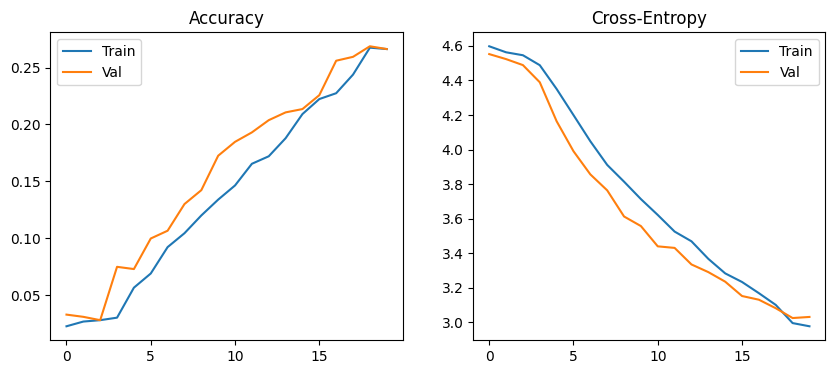

64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.2133 - loss: 3.1849


[2.9757301807403564, 0.2763671875]

In [5]:
train_it2 = datagen.flow_from_directory('flowers_split2/train', target_size=(224, 224), batch_size=32, class_mode='sparse')
val_it2 = val_gen.flow_from_directory('flowers_split2/val', target_size=(224, 224), batch_size=32, class_mode='sparse')
test_it2 = val_gen.flow_from_directory('flowers_split2/test', target_size=(224, 224), batch_size=32, class_mode='sparse', shuffle=False)

# Re-train same architecture
model2 = tf.keras.models.clone_model(model)
model2.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_it2, validation_data=val_it2, epochs=20)
plot_hist(history2)
model2.evaluate(test_it2)

In [6]:
%cd /content/yolov5
!python classify/train.py --model yolov5s-cls.pt --data ../flowers_split2 --epochs 30 --img 224 --batch-size 16 --name exp_split2

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2026-01-11 12:00:46.234472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768132846.254278   26141 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768132846.260300   26141 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768132846.276579   26141 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768132846.276610   26141 computation_placer.cc:177] computation placer a